## Обученная только на наших данных Rosetta (ResNet34 + None + CTC)

In [ ]:
!pip install paddleocr

In [ ]:
!pip install paddlepaddle-gpu

In [ ]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar

--2022-05-11 14:50:10--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204093440 (195M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’

en_PP-OCRv3_rec_tra 100%[===================>] 194.64M  11.3MB/s    in 44s     

2022-05-11 14:50:56 (4.46 MB/s) - ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’ saved [204093440/204093440]



In [ ]:
!tar -xf pretrain_models/en_PP-OCRv3_rec_train.tar && rm -rf pretrain_models/en_PP-OCRv3_rec_train.tar

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 35473, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 35473 (delta 72), reused 116 (delta 57), pack-reused 35330
Receiving objects: 100% (35473/35473), 319.00 MiB | 28.39 MiB/s, done.
Resolving deltas: 100% (24546/24546), done.


In [ ]:
!python PaddleOCR/ppocr/utils/gen_label.py --mode="rec" --input_path="drive/MyDrive/recognition_dataset/train_gt.txt" --output_label="train_rec_gt_label.txt"

Generate rec label


In [ ]:
!python PaddleOCR/ppocr/utils/gen_label.py --mode="rec" --input_path="drive/MyDrive/recognition_dataset/test_gt.txt" --output_label="test_rec_gt_label.txt"

Generate rec label


In [ ]:
!python3 PaddleOCR/tools/train.py -c rosetta.yml -o Global.pretrain_weights=./en_PP-OCRv3_rec_train/

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

In [ ]:
!python3 PaddleOCR/tools/infer_rec.py -c rosetta.yml -o Global.pretrained_model=output/rec/r34_vd_none_none_ctc/best_accuracy  Global.infer_img=drive/MyDrive/recognition_dataset/test_data/

In [ ]:
predicts_file_path = '/content/output/rec/predicts_r34_vd_none_none_ctc.txt'
with open(predicts_file_path) as f:
  lines = f.readlines()[0]

In [ ]:
import matplotlib.pyplot as plt

def visualize(image, prediction, confidence):
    plt.figure(figsize=(10, 10))
    plt.title('Prediction: %s, confidence: %.3f' % (prediction, confidence))
    plt.axis('off')
    plt.imshow(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


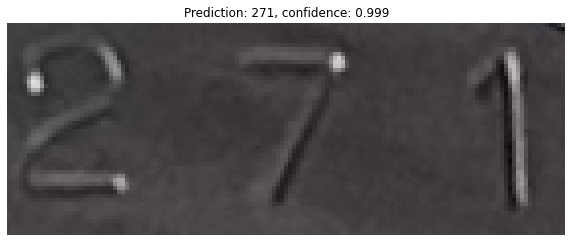

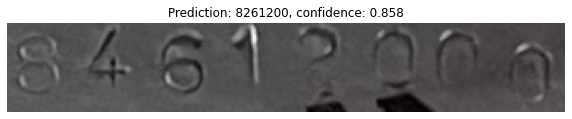

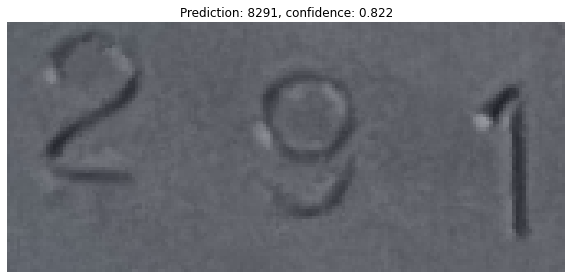

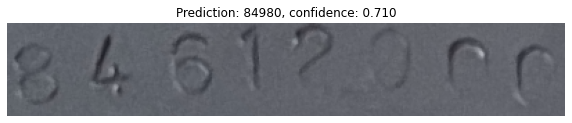

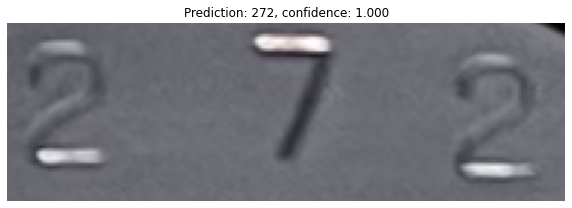

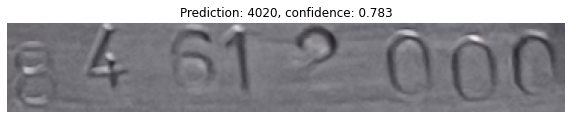

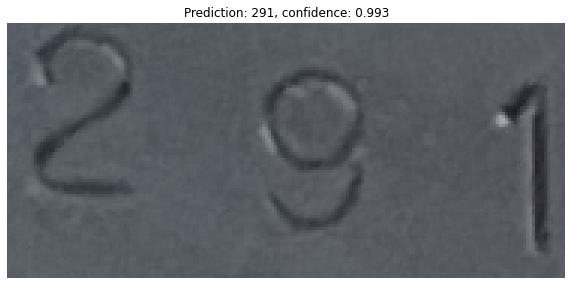

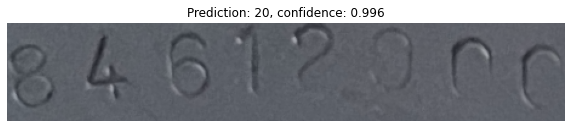

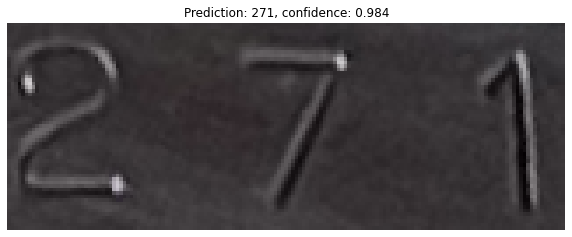

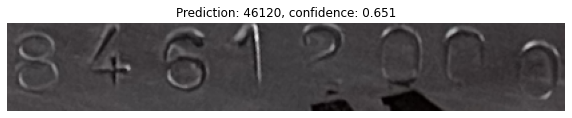

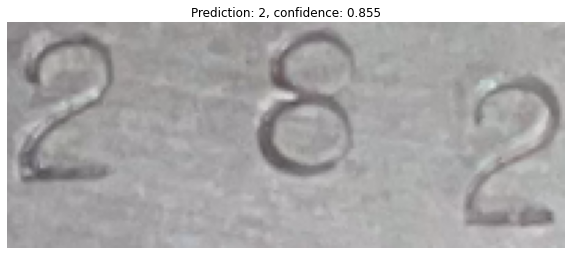

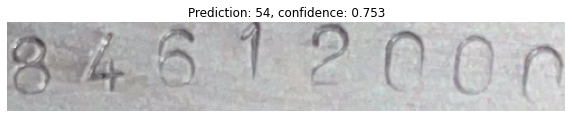

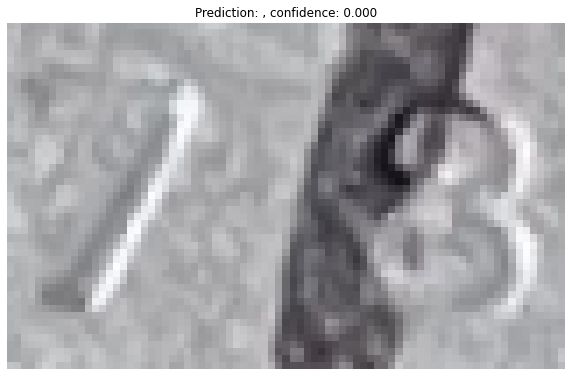

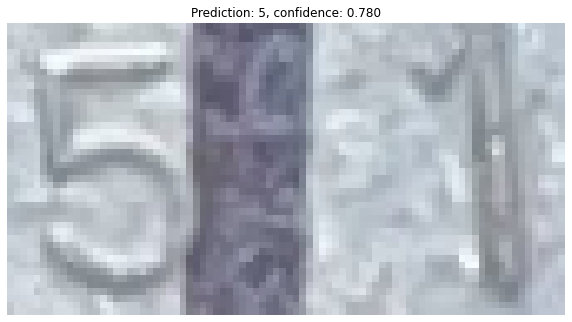

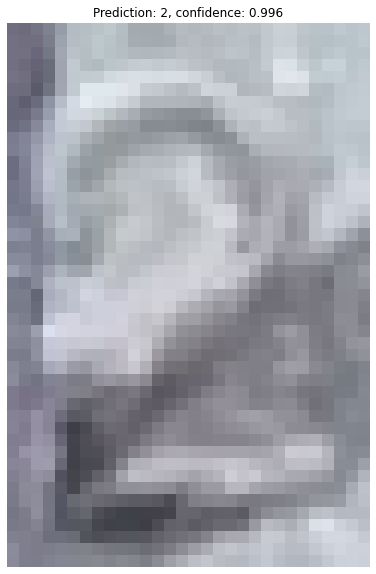

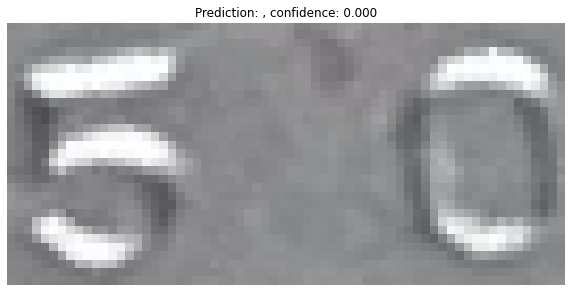

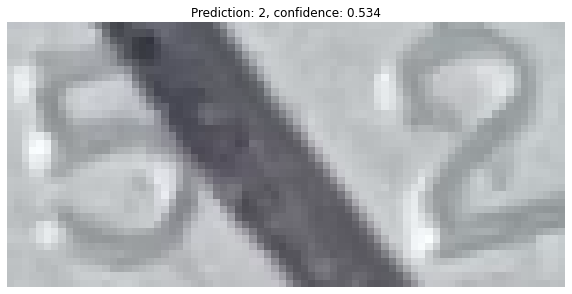

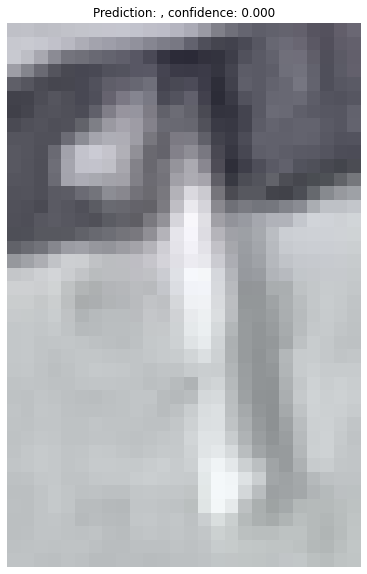

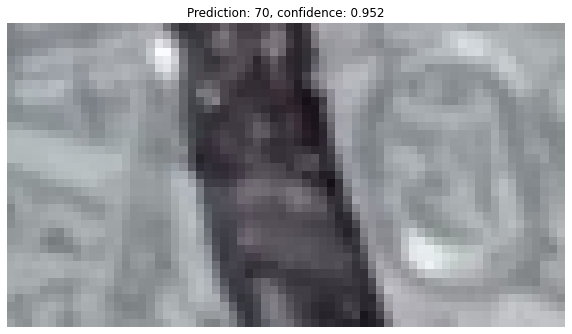

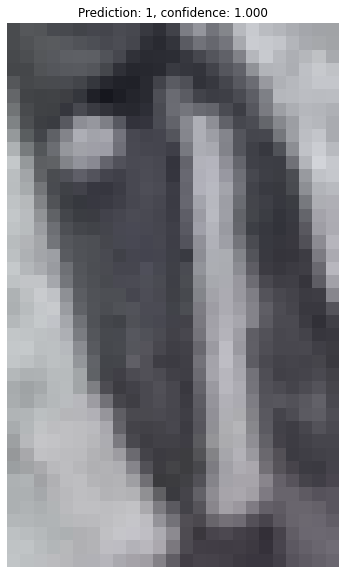

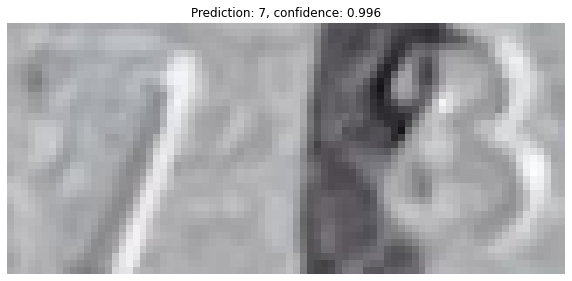

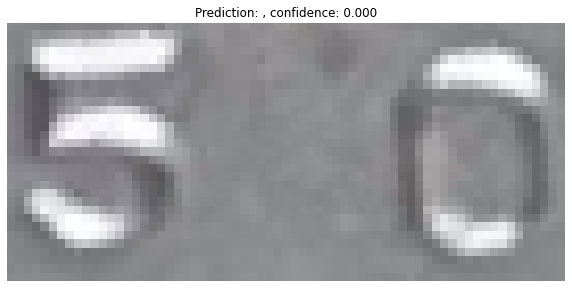

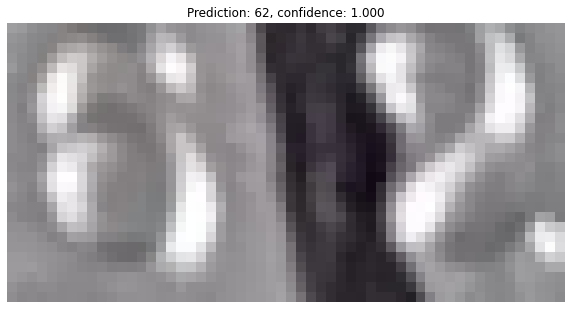

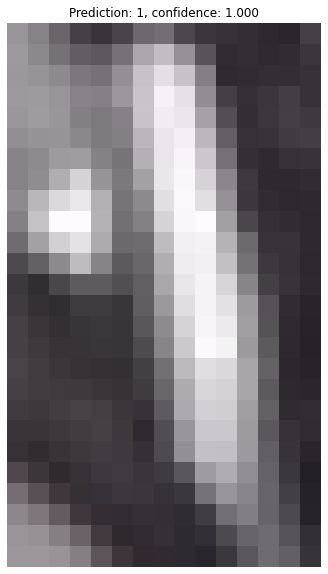

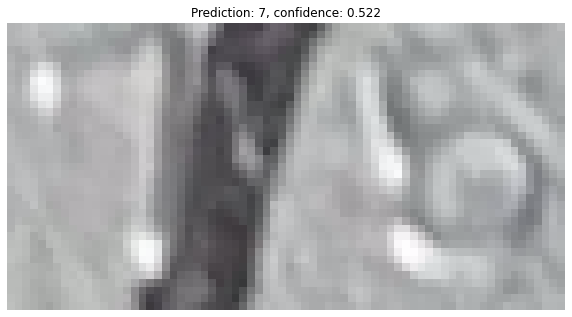

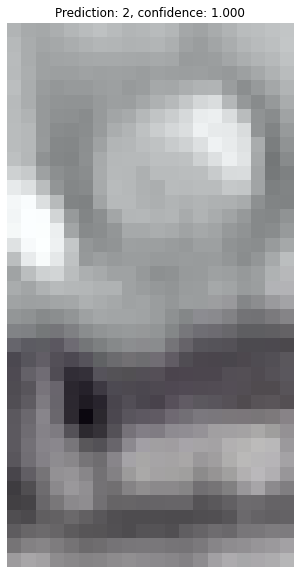

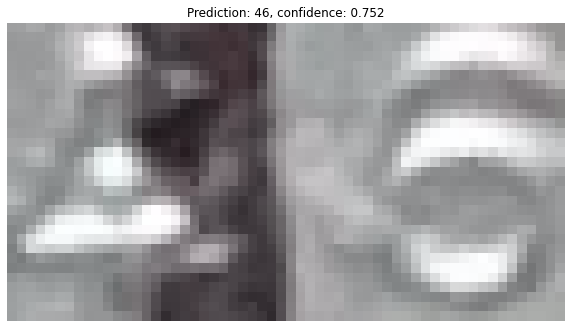

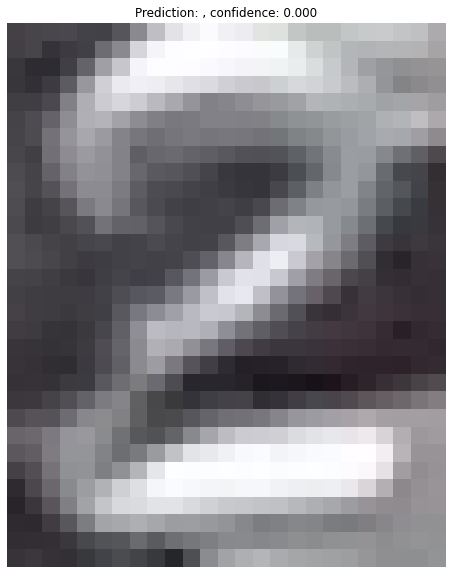

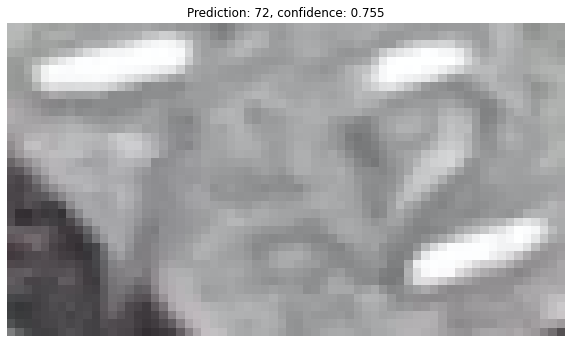

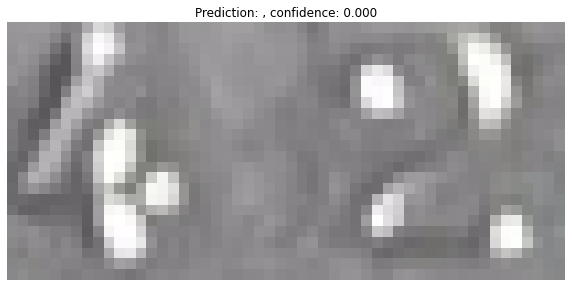

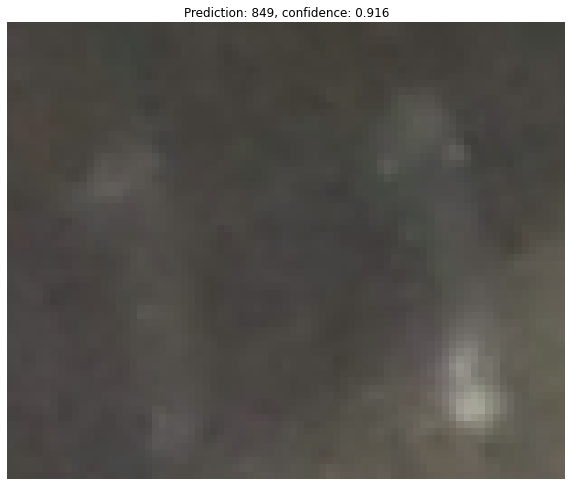

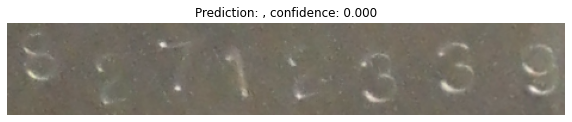

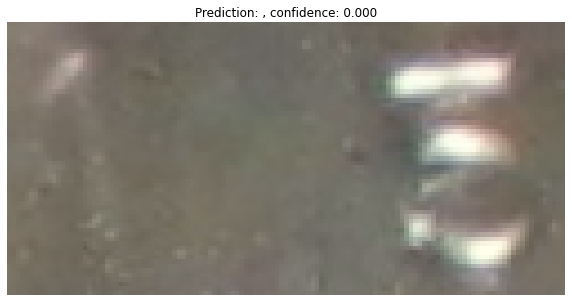

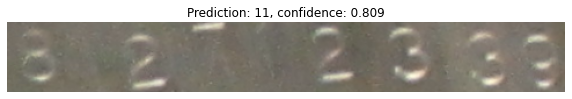

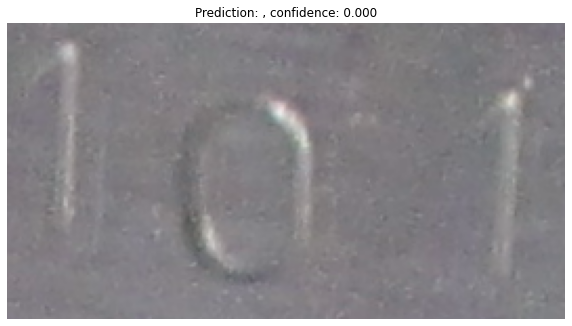

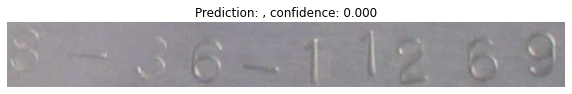

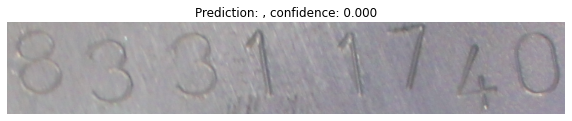

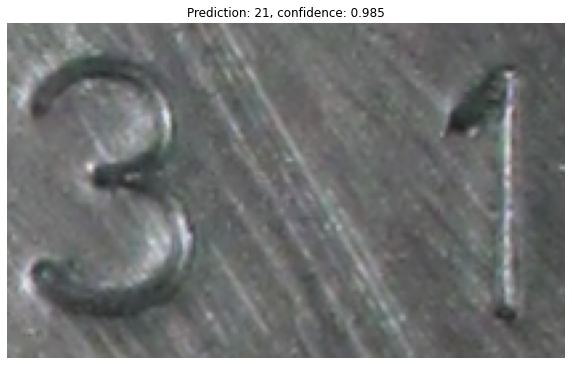

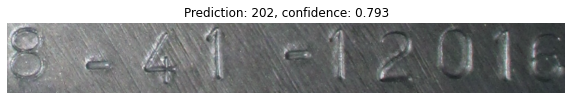

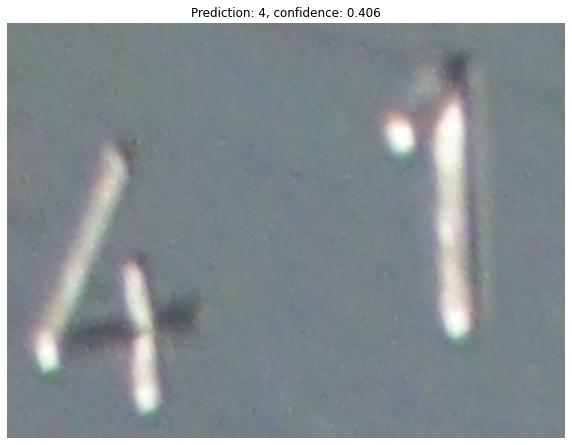

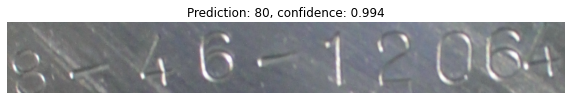

In [ ]:
import cv2

predicts = lines.replace('drive', '\ndrive').split('\n')[1:]
results_arr = [line.split('\t') for line in predicts]

for file_path, predict_number, confidence in results_arr:
  img = cv2.imread(file_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  visualize(img, predict_number, float(confidence))